<a href="https://colab.research.google.com/github/PRASADHAJARgw/Spotify_song_recomender/blob/main/Spotify_Nlp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install gdown
import pandas as pd
import numpy as np
import gdown
# https://drive.google.com/file/d/1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_/view?usp=drive_link
file_id = "1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_"
download_url = f"https://drive.google.com/uc?id={file_id}"

output = "data.csv"
gdown.download(download_url, output, quiet=False)
pd.set_option('display.max_columns', None)
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

Downloading...
From (original): https://drive.google.com/uc?id=1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_
From (redirected): https://drive.google.com/uc?id=1JhMQl_ZKg7PQjB-I_I41ngH1fLgFPlz_&confirm=t&uuid=e952204e-5630-4716-9354-2f588c7c91c0
To: /content/data.csv
100%|██████████| 42.7M/42.7M [00:00<00:00, 101MB/s] 
<ipython-input-1-3aa488529b33>:12: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='ISO-8859-1')


In [2]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')
df.head()

<ipython-input-2-529356daea9c>:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='ISO-8859-1')


,id,artists,available_markets,disc_number,duration_ms.x,explicit,href,is_local,name,popularity,preview_url,track_number,type.x,uri.x,album.album_type,album.artists,album.available_markets,album.href,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,album.external_urls.spotify,external_ids.isrc,external_urls.spotify,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type.y,uri.y,track_href,analysis_url,duration_ms.y,time_signature
0,000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/artists/5ZsFI1h6hId...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,188490,FALSE,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63,https://p.scdn.co/mp3-preview/cc28d32b3c106428...,1,track,spotify:track:000xQL6tZNLJzIrtIgxqSl,single,https://api.spotify.com/v1/artists/5ZsFI1h6hId...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/2kGUeTGnkLOY...,2kGUeTGnkLOYlinKRJe47G,"640, 300, 64, https://i.scdn.co/image/ab67616d...",Still Got Time (feat. PARTYNEXTDOOR),2017-03-23,day,1,album,spotify:album:2kGUeTGnkLOYlinKRJe47G,https://open.spotify.com/album/2kGUeTGnkLOYlin...,USRC11700675,https://open.spotify.com/track/000xQL6tZNLJzIr...,0.748,0.627,7.0,-6.029,1.0,0.0639,0.131000,0.000000,0.0852,0.524,120.963,audio_features,spotify:track:000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,https://api.spotify.com/v1/audio-analysis/000x...,188491.0,4.0
1,001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/artists/0XKOBt59crn...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,191053,FALSE,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,FALSE,Brand New Man - with Luke Combs,68,https://p.scdn.co/mp3-preview/20f3865bebd50d0f...,1,track,spotify:track:001UkMQHw4zXfFNdKpwXAF,album,https://api.spotify.com/v1/artists/0XKOBt59crn...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/0U3nI78LUpAw...,0U3nI78LUpAwprraUf7vAS,"640, 300, 64, https://i.scdn.co/image/ab67616d...",Reboot,2019-04-05,day,12,album,spotify:album:0U3nI78LUpAwprraUf7vAS,https://open.spotify.com/album/0U3nI78LUpAwprr...,USAN21800051,https://open.spotify.com/track/001UkMQHw4zXfFN...,0.573,0.846,7.0,-4.866,1.0,0.0344,0.003720,0.000079,0.2900,0.562,127.061,audio_features,spotify:track:001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,https://api.spotify.com/v1/audio-analysis/001U...,191053.0,4.0
2,003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/artists/3vAaWhdBR38...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,233266,FALSE,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,FALSE,"Swing, Swing",67,NaN,3,track,spotify:track:003FTlCpBTM4eSqYSWPv4H,album,https://api.spotify.com/v1/artists/3vAaWhdBR38...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/0TvOeelcHQXY...,0TvOeelcHQXYgPcyQiLhyR,"640, 300, 64, https://i.scdn.co/image/ab67616d...",The All-American Rejects,2002-10-15,day,11,album,spotify:album:0TvOeelcHQXYgPcyQiLhyR,https://open.spotify.com/album/0TvOeelcHQXYgPc...,USDW10200529,https://open.spotify.com/track/003FTlCpBTM4eSq...,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,audio_features,spotify:track:003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,https://api.spotify.com/v1/audio-analysis/003F...,233267.0,4.0
3,003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/artists/0C0XlULifJt...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,222973,FALSE,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,FALSE,Mr. Brightside,80,NaN,2,track,spotify:track:003vvx7Niy0yvhvHt4a68B,album,https://api.spotify.com/v1/artists/0C0XlULifJt...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",https://api.spotify.com/v1/albums/4piJq7R3gjUO...,4piJq7R3gjUOxnYs6lDCTg,"640, 300, 64, https://i.scdn.co/image/ab67616d...",Hot Fuss,2004,y

In [3]:
# df = pd.read_csv("data.csv", encoding='cp1252')

In [4]:
df.dropna(inplace=True)

In [5]:
a=df["artists"].head(1)
a

,artists
0,https://api.spotify.com/v1/artists/5ZsFI1h6hId...


In [6]:
def clean_artists_column(artist_string):
    if pd.isna(artist_string):
        return []

    items = [item.strip() for item in artist_string.split(",")]

    prefixes_to_remove = [
        "https://api.spotify.com/v1/artists/",
        "spotify:artist:",
        "https://open.spotify.com/artist/"
    ]

    cleaned_items = []
    for item in items:
        for prefix in prefixes_to_remove:
            if item.startswith(prefix):
                item = item.replace(prefix, "")
        cleaned_items.append(item)

    final_items = [item for item in cleaned_items if item.lower() != "artist"]
    seen = set()
    unique_items = []
    for item in final_items:
        if item not in seen:
            unique_items.append(item)
            seen.add(item)

    return unique_items
df['updated_artists'] = df['artists'].apply(clean_artists_column)

In [7]:
df['available_markets'] = df['available_markets'].str.split(', ')
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
market_dummies = pd.DataFrame(mlb.fit_transform(df['available_markets']),
                              columns=mlb.classes_,
                              index=df.index)
df = df.join(market_dummies)

In [8]:
df.columns
df.drop(columns=["artists","uri.x","is_local","type.x","href","album.artists","album.href","album.images","album.uri","album.external_urls.spotify","external_urls.spotify","uri.y","track_href","analysis_url","preview_url","album.available_markets","available_markets"],inplace=True)

In [9]:
df.head()

,id,disc_number,duration_ms.x,explicit,name,popularity,track_number,album.album_type,album.id,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,external_ids.isrc,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type.y,duration_ms.y,time_signature,updated_artists,AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HR,HU,ID,IE,IL,IN,IS,IT,JO,JP,KW,KZ,LB,LI,LT,LU,LV,MA,MC,MD,ME,MK,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SI,SK,SV,TH,TN,TR,TW,UA,US,UY,VN,XK,ZA
0,000xQL6tZNLJzIrtIgxqSl,1,188490,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63,1,single,2kGUeTGnkLOYlinKRJe47G,Still Got Time (feat. PARTYNEXTDOOR),2017-03-23,day,1,album,USRC11700675,0.748,0.627,7.0,-6.029,1.0,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,audio_features,188491.0,4.0,"[5ZsFI1h6hIdQRw2ti0hz81, 2HPaUgqeutzr3jx5a9WyD...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,001UkMQHw4zXfFNdKpwXAF,1,191053,FALSE,Brand New Man - with Luke Combs,68,1,album,0U3nI78LUpAwprraUf7vAS,Reboot,2019-04-05,day,12,album,USAN21800051,0.573,0.846,7.0,-4.866,1.0,0.0344,0.00372,0.000079,0.2900,0.5620,127.061,audio_features,191053.0,4.0,"[0XKOBt59crntr7HQXXO8Yz, 718COspgdWOnwOFpJHRZH...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,007EFIByaEW4dgEcIbfBg9,1,170626,FALSE,Hasta Que un dÃ­,58,1,single,6eeRsUeGzjjg0MHek4DmcR,Hasta Que un dÃ­,2018-10-25,day,1,album,QZ85W1701032,0.684,0.564,10.0,-6.852,1.0,0.0297,0.42500,0.000000,0.1520,0.3680,134.958,audio_features,170627.0,4.0,"[1dKdetem2xEmjgvyymzytS, Grupo Firme]",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,009thiR2SWpG6jXqXYX2AT,1,152784,FALSE,Cuantas Amantes,53,1,single,3YKLNFNyg3a1ZSYO9z3EHr,Cuantas Amantes,2020-10-30,day,1,album,SE5IB2001952,0.754,0.169,4.0,-14.999,0.0,0.0540,0.96500,0.872000,0.1140,0.4220,93.952,audio_features,152784.0,4.0,"[4qxGMBS25xDymfWz3kkKOE, Xavier Suarez]",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,00bOuKgzbRkOHmgCAL7ChZ,1,271680,FALSE,Zoning,50,1,single,3BgFl5yBvQnuJCvESIrrSV,Zoning,2019-09-06,day,1,album,GBKPL1961103,0.629,0.877,7.0,-4.642,1.0,0.0402,0.02890,0.408000,0.1060,0.0369,104.978,audio_features,271680.0,4.0,"[0QJKELJZZuLAjqLOOixJm5, 28j8lBWDdDSHSSt5oPlsX...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
df["album.release_date_precision"].value_counts()

,count
album.release_date_precision,
day,11246
year,544
month,13


In [11]:
df.dropna(inplace=True)

In [12]:
# for col in df_encoded.columns:
#     print(f"Unique values in column '{col}': {df_encoded[col].nunique()}")


In [13]:
# # for col in df_encoded.columns:
#     print(f"NAN values in column '{col}': {df_encoded[col].isna().sum()}")

In [14]:
features = [
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# # Load your data
# df = pd.read_csv('your_dataset.csv')  # or however you have it

# Keep only the needed features
X = df[features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [17]:
# !pip3 install tensorflow
!pip3 install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 89.0 MB/s eta 0:00:00


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_scaled.shape[1]

# Autoencoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
embedding = layers.Dense(16, activation='relu', name='embedding_layer')(encoded)

decoded = layers.Dense(32, activation='relu')(embedding)
decoded = layers.Dense(64, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4259
Epoch 2/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090
Epoch 3/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 4/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 5/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029
Epoch 6/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
Epoch 7/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
Epoch 8/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016
Epoch 9/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 10/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8949e-04
Epoch 11/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0957e-04
Epoch 12/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4953e-04
Epoch 13/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0039e-04
Epoch 14/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1753e-04
Epoch 15/30
369/369 ━━━━━━━━━━━━━━━━━

In [19]:
embedding_model = models.Model(inputs=autoencoder.input,
                               outputs=autoencoder.get_layer('embedding_layer').output)

song_embeddings = embedding_model.predict(X_scaled)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_similar_songs(song_index, top_n=5):
    similarities = cosine_similarity(
        [song_embeddings[song_index]],
        song_embeddings
    )[0]

    # Exclude the song itself
    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    return df.iloc[similar_indices][['name', 'updated_artists', 'album.name']]

In [21]:
def recommend_similar_songs(song_index, top_n=5):
    similarities = cosine_similarity(
        [song_embeddings[song_index]],
        song_embeddings
    )[0]

    similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    return df.iloc[similar_indices][['name', 'updated_artists', 'album.name']]

# Example: Recommend songs similar to the first track
recommend_similar_songs(0)


,name,updated_artists,album.name
17536,I'm Just Feelin' (Du Du Du),"[5rGrDvrLOV2VV8SCFVGWlj, 4ehtJnVumNf6xzSCDk8aL...",I'm Just Feelin' (Du Du Du)
15617,You Calling My Name,"[6nfDaffa50mKtEOwR8g4df, GOT7]",Call My Name
18845,Lay It on Me,"[10exVja0key0uqUkk6LJRT, Vance Joy]",Nation of Two
13120,Loving Is Easy,"[7pbDxGE6nQSZVfiFdq9lOL, 4gHcu2JoaXJ0mV4aNPCd7...",Loving Is Easy
17504,Pro's and Con's,"[1e0qSryQI4zCOcBKrSMBYe, Dannyland]",Scattered Thoughts


In [22]:
def recommend_by_name(song_name, top_n=5):
    song_index = df[df['name'] == song_name].index[0]
    return recommend_similar_songs(song_index, top_n=top_n)

# Try:
recommend_by_name("Still Got Time (feat. PARTYNEXTDOOR)")

,name,updated_artists,album.name
17536,I'm Just Feelin' (Du Du Du),"[5rGrDvrLOV2VV8SCFVGWlj, 4ehtJnVumNf6xzSCDk8aL...",I'm Just Feelin' (Du Du Du)
15617,You Calling My Name,"[6nfDaffa50mKtEOwR8g4df, GOT7]",Call My Name
18845,Lay It on Me,"[10exVja0key0uqUkk6LJRT, Vance Joy]",Nation of Two
13120,Loving Is Easy,"[7pbDxGE6nQSZVfiFdq9lOL, 4gHcu2JoaXJ0mV4aNPCd7...",Loving Is Easy
17504,Pro's and Con's,"[1e0qSryQI4zCOcBKrSMBYe, Dannyland]",Scattered Thoughts


In [23]:
def recommend_by_name(song_name, top_n=5):
    matches = df[df['name'].str.lower() == song_name.lower()]
    if matches.empty:
        return f"Song '{song_name}' not found."
    song_index = matches.index[0]
    return recommend_similar_songs(song_index, top_n=top_n)

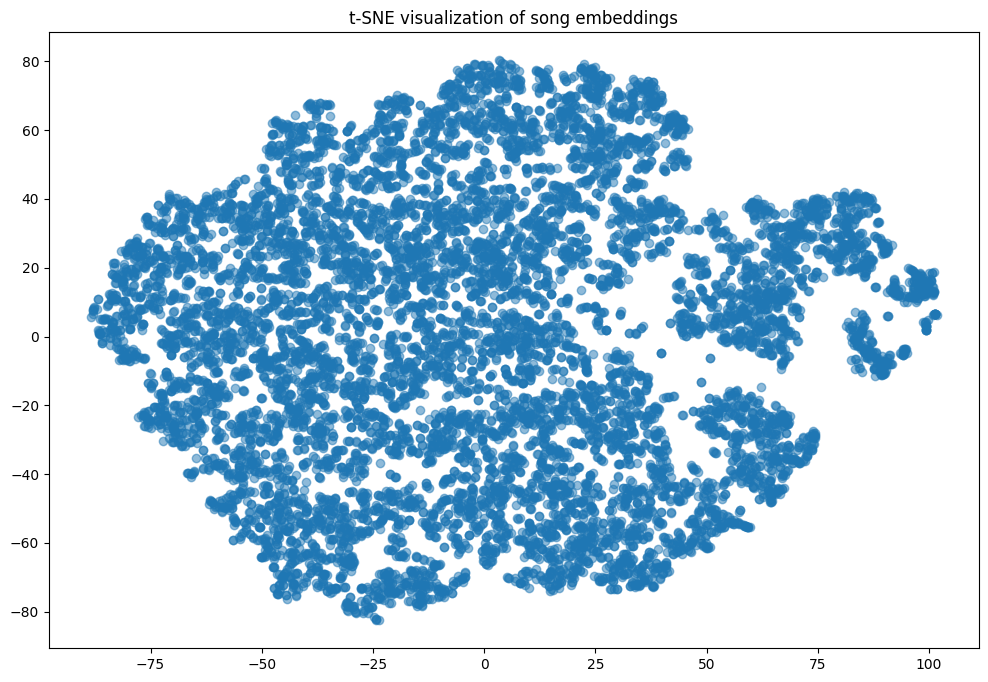

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced = tsne.fit_transform(song_embeddings)

plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
plt.title("t-SNE visualization of song embeddings")
plt.show()

In [25]:
loss = autoencoder.evaluate(X_scaled, X_scaled)
print(f"Autoencoder reconstruction loss: {loss:.4f}")

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2138e-05
Autoencoder reconstruction loss: 0.0001


In [26]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(song_embeddings)

score = silhouette_score(song_embeddings, labels)
print(f"Silhouette score: {score:.4f}")

Silhouette score: 0.1922


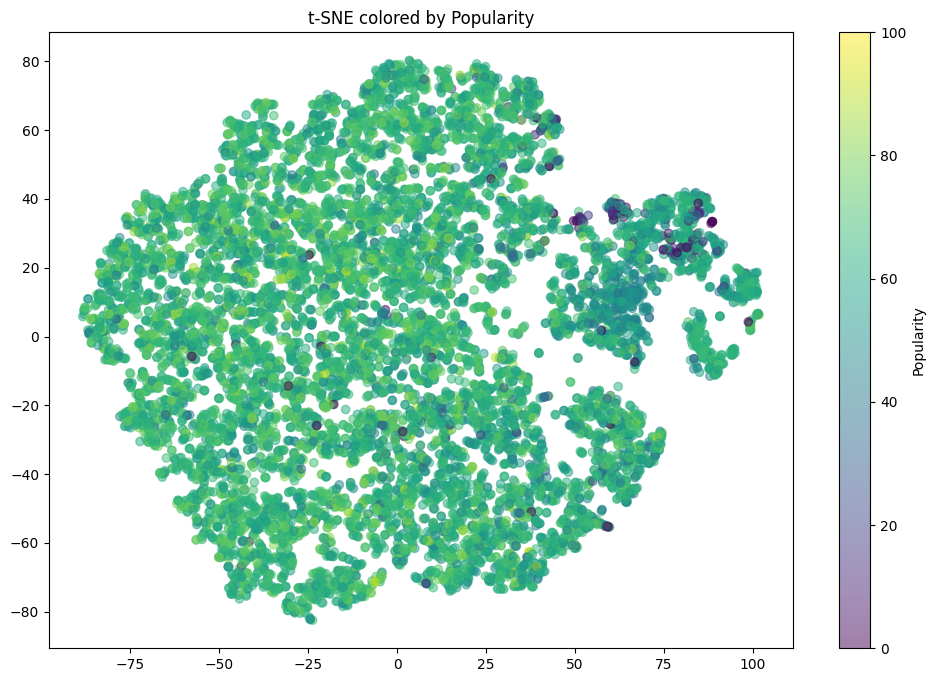

In [27]:
colors = pd.to_numeric(df['popularity'], errors='coerce')  # converts strings to numbers
plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, cmap='viridis', alpha=0.5)
plt.title("t-SNE colored by Popularity")
plt.colorbar(label='Popularity')
plt.show()

In [28]:
df['description'] = (
    df['name'] + ' by ' + df['updated_artists'].apply(lambda x: ', '.join(x)) +
    '. Energetic: ' + df['energy'].round(2).astype(str) +
    ', Danceable: ' + df['danceability'].round(2).astype(str) +
    ', Mood: ' + df['valence'].round(2).astype(str)
)


In [29]:
!pip install sentence_transformers
!pip install tf-keras
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, effective

song_embeddings = model.encode(df['description'].tolist(), show_progress_bar=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/369 [00:00<?, ?it/s]

In [30]:
def recommend_by_prompt(prompt, top_n=5):
    query_embedding = model.encode([prompt])[0]
    sims = cosine_similarity([query_embedding], song_embeddings)[0]
    top_indices = sims.argsort()[::-1][:top_n]
    return df.iloc[top_indices][['name', 'updated_artists', 'album.name']]

In [31]:
# recommend_by_prompt("happy upbeat party song", top_n=5)
# # recommend_by_prompt("something mellow and sad", top_n=5)
# # recommend_by_prompt("romantic slow dance", top_n=5)
# recommend_by_prompt("Indian sad song", top_n=5)
recommend_by_prompt("Indian happy  song", top_n=5)

,name,updated_artists,album.name
8569,Be Happy - Remix,"[3DKkhRCGOG4e8IUPYFPfWs, 2cFrymmkijnjDg9SS92EP...",Be Happy (Remix)
3101,"Dil Diyan Gallan (From ""Tiger Zinda Hai"")","[2oSONSC9zQ4UonDKnLqksx, Atif Aslam]",YRF Top 10 - Rewind
6993,Happy Does,"[3grHWM9bx2E9vwJCdlRv9O, Kenny Chesney]",Here And Now
3681,Be Happy,"[3DKkhRCGOG4e8IUPYFPfWs, Dixie DâAmelio, 3DK...",Be Happy
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020


In [32]:
prompt = "Indian sad song"  # or any test phrase

In [33]:
query_embedding = model.encode([prompt])[0]
sims = cosine_similarity([query_embedding], song_embeddings)[0]

In [34]:
country_bias = 0.15  # Strength of boost; tune as needed
bias = df['IN'] * country_bias  # 1 if in India, else 0
biased_scores = sims + bias

In [35]:
top_n = 5  # or however many results you want
top_indices = biased_scores.argsort()[::-1][:top_n]
results = df.iloc[top_indices][['name', 'updated_artists', 'album.name', 'description']]

In [36]:
def recommend_biased_by_country(prompt, country_code='IN', country_boost=0.15, top_n=5):
    query_embedding = model.encode([prompt])[0]
    sims = cosine_similarity([query_embedding], song_embeddings)[0]

    # Add country bias softly
    bias = df[country_code] * country_boost
    biased_scores = sims + bias

    top_indices = biased_scores.argsort()[::-1][:top_n]
    return df.iloc[top_indices][['name', 'updated_artists', 'album.name', 'description']]

In [37]:
recommend_biased_by_country("Arijit Singh", country_code='IN', country_boost=0.9, top_n=5)

,name,updated_artists,album.name,description
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Aye Dekhe Jaa by 4YRxDV8wJFPHPTeXepOstw, Ariji..."
18118,Ore Mon Udashi,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Bangla Emotional Hits,"Ore Mon Udashi by 4YRxDV8wJFPHPTeXepOstw, Arij..."
9768,Abar Phire Ele,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Abar Phire Ele by 4YRxDV8wJFPHPTeXepOstw, Arij..."
10609,Zaalima,"[4YRxDV8wJFPHPTeXepOstw, 3xU8YsNNkmWSPewlB18NU...",Raees,"Zaalima by 4YRxDV8wJFPHPTeXepOstw, 3xU8YsNNkmW..."
16273,Chantaje (feat. Maluma),"[0EmeFodog0BfCgMzAIvKQp, 1r4hJ1h58CWwUQe3MxPua...",El Dorado,Chantaje (feat. Maluma) by 0EmeFodog0BfCgMzAIv...


In [38]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=17e50c2fdecd6d91c92715df26f89e2f12a9bbf0db6436cc3f181cddae9c99ee
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [39]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0  # Make results consistent

In [40]:
language_to_country = {
    'hi': 'IN',
    'pa': 'IN',
    'ta': 'IN',
    'te': 'IN',
    'en': 'US',
    'es': 'ES',
    'fr': 'FR',
    'de': 'DE',
    'ja': 'JP',
    'ko': 'KR'
}

In [41]:
def detect_language(title):
    try:
        return detect(title)
    except:
        return 'unknown'

df['detected_language'] = df['name'].apply(detect_language)
df['country_code'] = df['detected_language'].apply(lambda lang: language_to_country.get(lang, 'IN'))  # fallback: IN

In [42]:
df['description'] = (
    df['name'] + ' by ' + df['updated_artists'].apply(lambda x: ', '.join(x)) +
    '. Language: ' + df['detected_language'] +
    '. Energy: ' + df['energy'].round(2).astype(str) +
    ', Danceability: ' + df['danceability'].round(2).astype(str) +
    ', Valence: ' + df['valence'].round(2).astype(str)
)

In [43]:
model = SentenceTransformer('all-MiniLM-L6-v2')
song_embeddings = model.encode(df['description'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/369 [00:00<?, ?it/s]

In [44]:
def smart_recommend(prompt, country_boost=0.2, top_n=5):
    query_embedding = model.encode([prompt])[0]
    sims = cosine_similarity([query_embedding], song_embeddings)[0]

    # Detect country from prompt
    try:
        prompt_lang = detect(prompt)
    except:
        prompt_lang = 'unknown'

    prompt_country = language_to_country.get(prompt_lang, 'IN')

    # Apply bias using country column
    bias = df[prompt_country] * country_boost if prompt_country in df.columns else 0
    biased_scores = sims + bias

    top_indices = biased_scores.argsort()[::-1][:top_n]
    return df.iloc[top_indices][['name', 'updated_artists', 'album.name', 'description', 'detected_language']]

In [45]:
smart_recommend("happy hindi song Atif Aslam")

,name,updated_artists,album.name,description,detected_language
3101,"Dil Diyan Gallan (From ""Tiger Zinda Hai"")","[2oSONSC9zQ4UonDKnLqksx, Atif Aslam]",YRF Top 10 - Rewind,"Dil Diyan Gallan (From ""Tiger Zinda Hai"") by 2...",tr
16975,Ruler Rebel (X. aTunde Adjuah Remix),"[2q37Nw8NND2z1T1KU5XVfn, Christian Scott aTund...",The Emancipation Procrastination,Ruler Rebel (X. aTunde Adjuah Remix) by 2q37Nw...,de
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Aye Dekhe Jaa by 4YRxDV8wJFPHPTeXepOstw, Ariji...",so
18979,DÃ©solÃ© (feat. Fatoumata Diawara) - Extended ...,"[3AA28KZvwAUcZuOKwyblJQ, 4G5ZJny3HvX6Il7eHVfnN...","Song Machine, Season One: Strange Timez (Deluxe)",DÃ©solÃ© (feat. Fatoumata Diawara) - Extended ...,en
4024,"Thanmaya Naanu (From ""Zamana"")","[70B80Lwx2sxti0M1Ng9e8K, 0gGWvTJmHll6hwscYp0pn...",Voice Of Udit Narayan Birthday Special Kannada...,"Thanmaya Naanu (From ""Zamana"") by 70B80Lwx2sxt...",tl


In [46]:
smart_recommend("Punjabi party track")


,name,updated_artists,album.name,description,detected_language
5651,Grove St. Party (feat. Kebo Gotti),"[6f4XkbvYlXMH0QgVRzW0sM, 00UOluVoYY4F2blO5DmgR...",Flockaveli,Grove St. Party (feat. Kebo Gotti) by 6f4XkbvY...,en
17069,Bangarang (feat. Sirah),"[5he5w2lnU9x7JFhnwcekXX, 3oAazIwC0nAYkOKVQPUC3...",Bangarang EP,Bangarang (feat. Sirah) by 5he5w2lnU9x7JFhnwce...,id
17517,"Numbers (feat. Roddy Ricch, Gunna and London O...","[31W5EY0aAly4Qieq6OFu6I, 5Nf5yishRW9Ye174sJISk...",Artist 2.0,"Numbers (feat. Roddy Ricch, Gunna and London O...",en
3639,Party (feat. Usher & Gucci Mane),"[7bXgB6jMjp9ATFy66eO08Z, 23zg3TcAtWQy7J6upgbUn...",Heartbreak on a Full Moon,Party (feat. Usher & Gucci Mane) by 7bXgB6jMjp...,en
2546,Aye Dekhe Jaa,"[4YRxDV8wJFPHPTeXepOstw, Arijit Singh]",Top 20 of 2020,"Aye Dekhe Jaa by 4YRxDV8wJFPHPTeXepOstw, Ariji...",so


In [49]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 11.8 MB/s eta 0:00:00


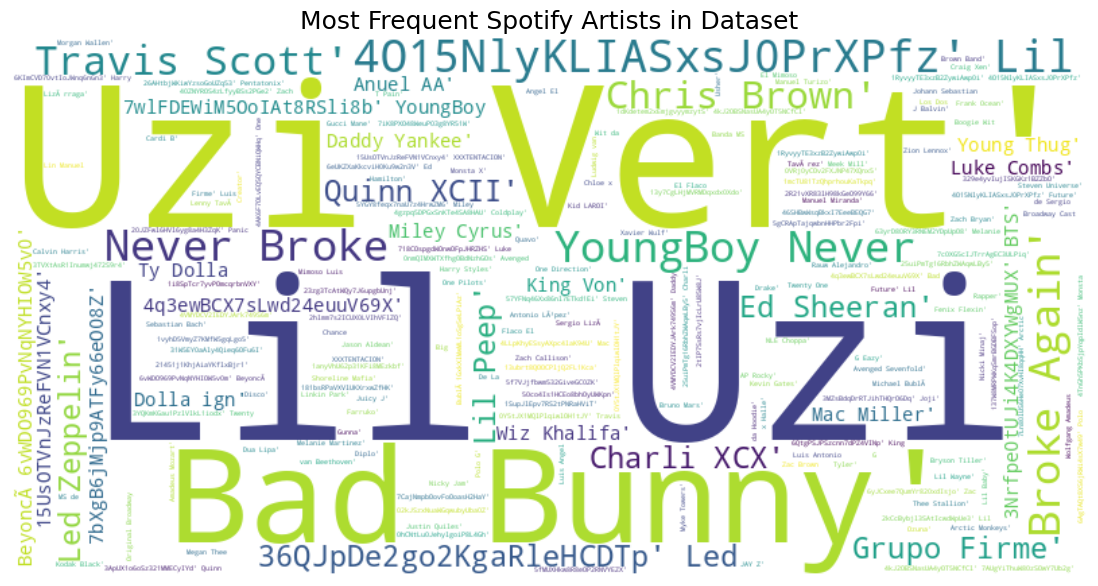

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all artist names into a single string
text = " ".join(artist for artist in df["updated_artists"].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Spotify Artists in Dataset", fontsize=18)
plt.show()

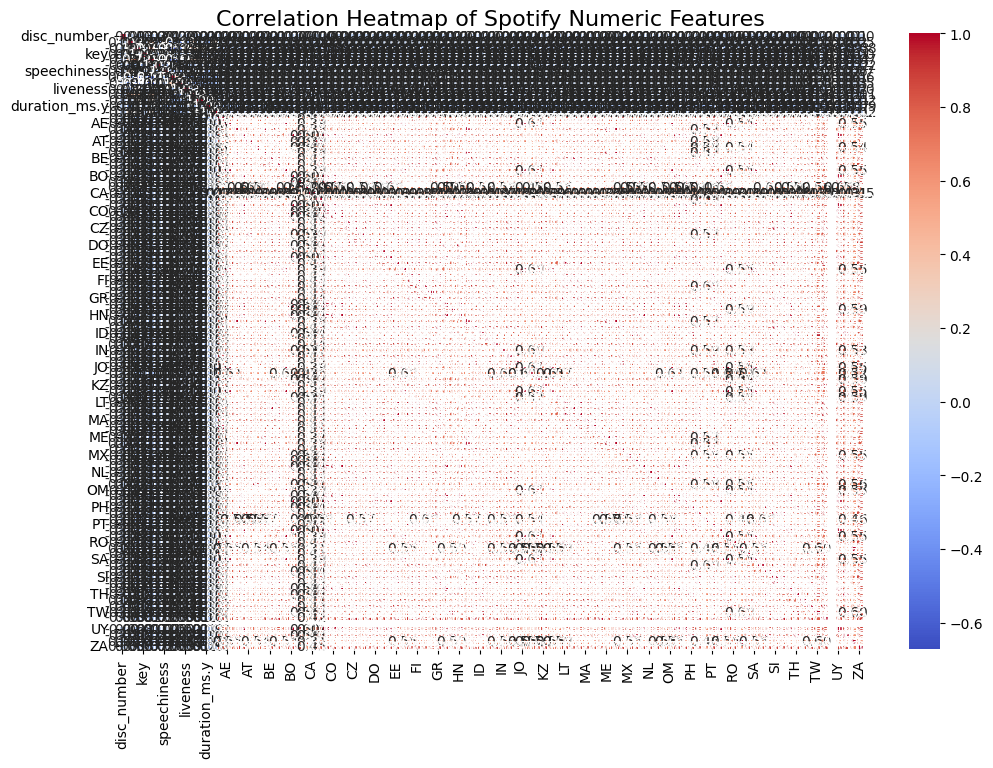

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Spotify Numeric Features", fontsize=16)
plt.show()

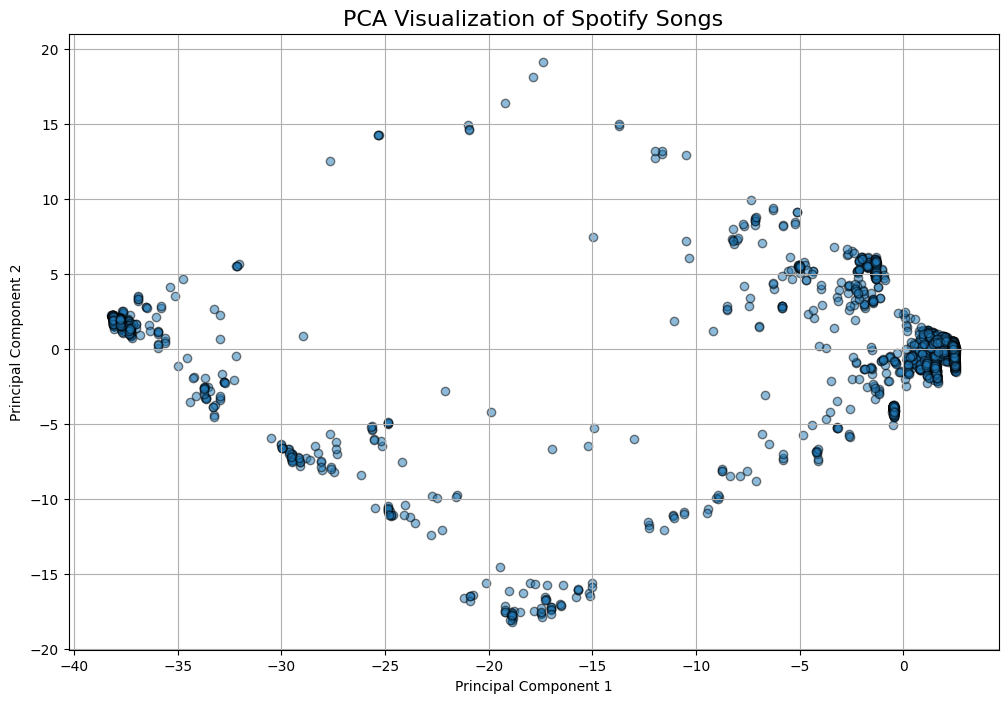

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric features and standardize them
features = df.select_dtypes(include=['float64', 'int64'])
scaled_features = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the PCA result
plt.figure(figsize=(12, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, edgecolors='k')
plt.title('PCA Visualization of Spotify Songs', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

<ipython-input-54-8be450e0179f>:12: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


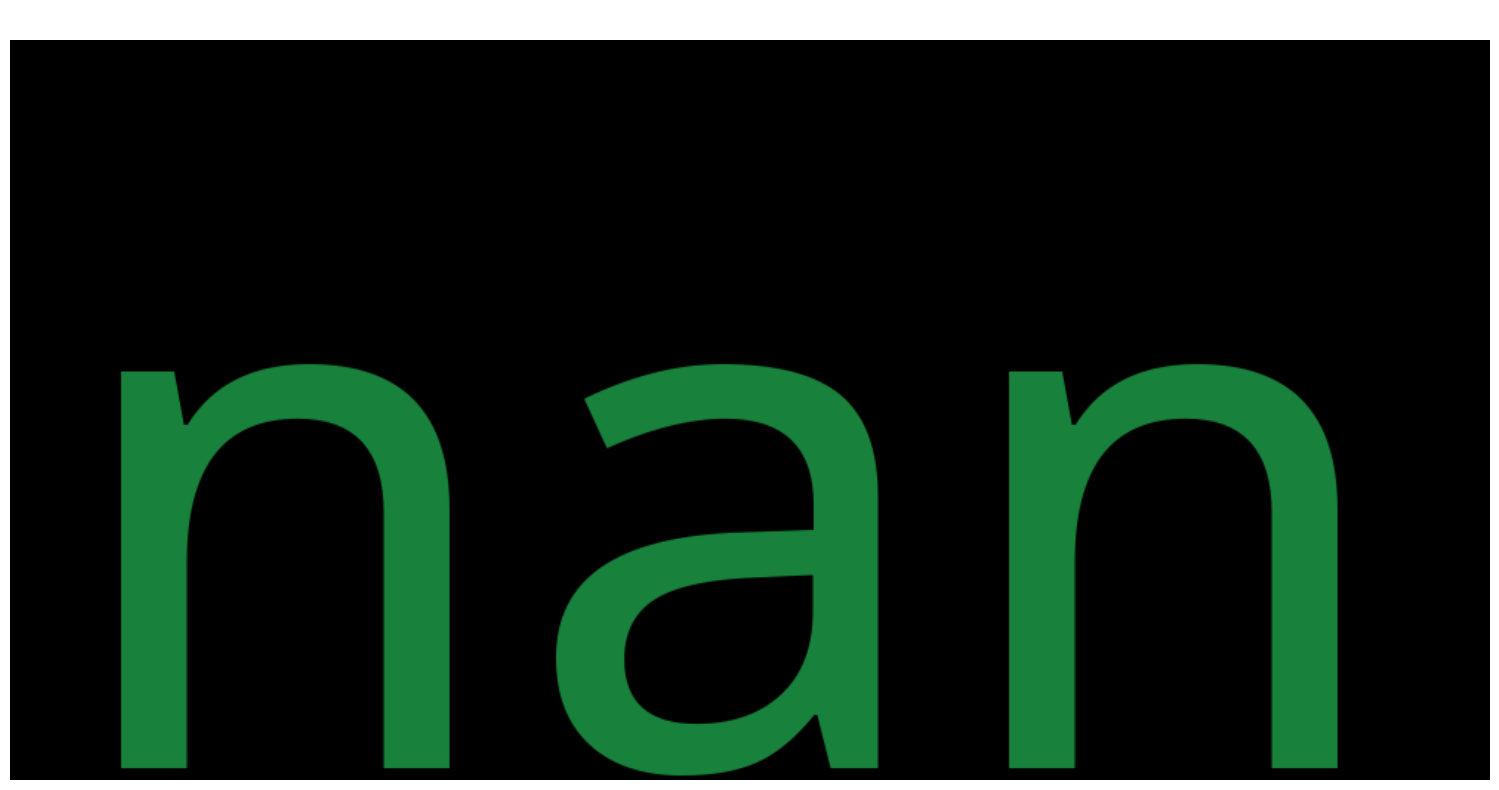

In [54]:
# Clean artist names (remove weird characters or IDs)
df['clean_artists'] = df['updated_artists'].str.replace(r"[^\w\s]", "", regex=True)

# Generate improved Word Cloud
text = " ".join(artist for artist in df["clean_artists"].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Greens').generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🎶 Most Frequent Spotify Artists", fontsize=20, color="white")
plt.tight_layout()
plt.show()

<ipython-input-55-9cacbf48110a>:9: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


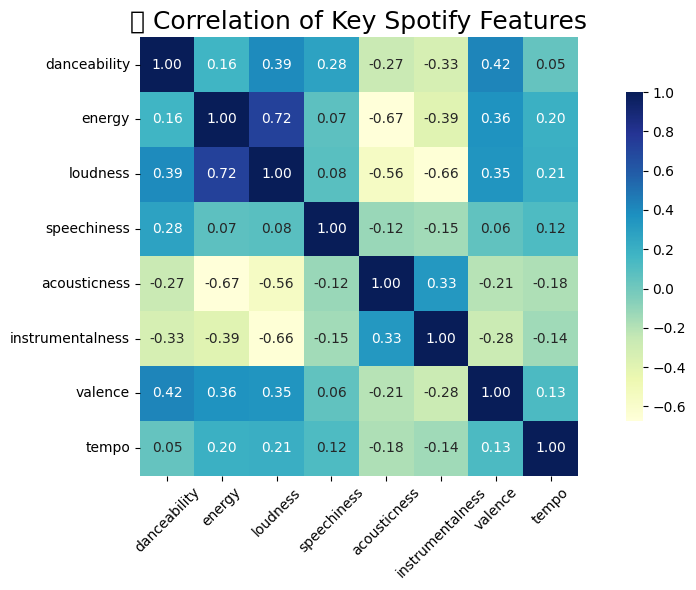

In [55]:
selected_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
corr = df[selected_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", square=True, cbar_kws={"shrink": 0.75})
plt.title("🎧 Correlation of Key Spotify Features", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-56-41e0de58b9a1>:7: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


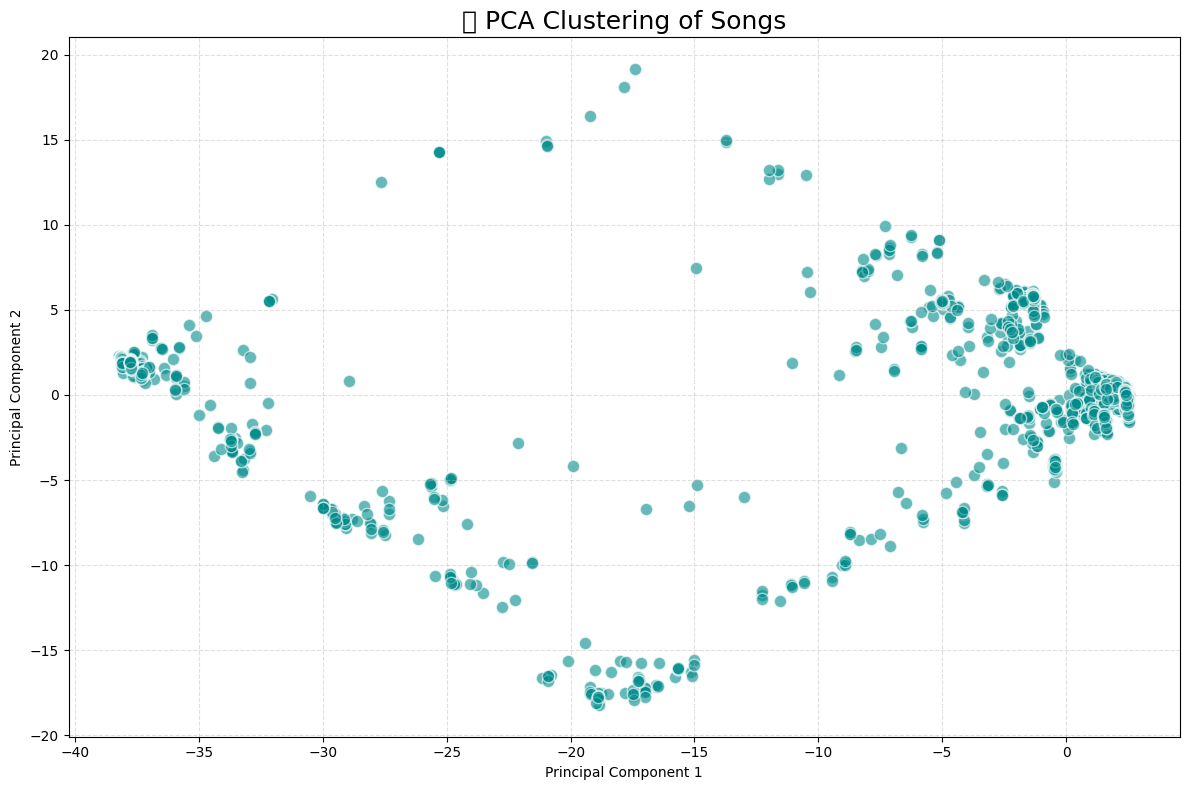

In [56]:
plt.figure(figsize=(12, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.6, c='darkcyan', edgecolors='w', s=80)
plt.title("🌀 PCA Clustering of Songs", fontsize=18)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()